13. **Can one define different classes of peaks based on the signal and its variation across cells?**
                                                    NK.27+11b-.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.82   
(ImmGenATAC1219.peak_2, chr1, 3087226, 0.0, 0.5...           1.46   
(ImmGenATAC1219.peak_3, chr1, 3120109, 0.07, 10...           0.20   
(ImmGenATAC1219.peak_4, chr1, 3121485, 0.15, 3....           1.72   
(ImmGenATAC1219.peak_5, chr1, 3372787, 0.03, 1....           0.20   
(ImmGenATAC1219.peak_6, chr1, 3399217, 0.06, 2....           1.46   
(ImmGenATAC1219.peak_7, chr1, 3400115, 0.44, 2....           0.82   
(ImmGenATAC1219.peak_8, chr1, 3416260, 0.01, 2....           1.10   
(ImmGenATAC1219.peak_9, chr1, 3434092, 0.18, 1....           2.68   
(ImmGenATAC1219.peak_10, chr1, 3434378, 0.15, 1...           1.72   

                                                    NK.27+11b+.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.22   


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\subprocess.py", line 1612, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "<frozen codecs>", line 325, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 109: invalid start byte


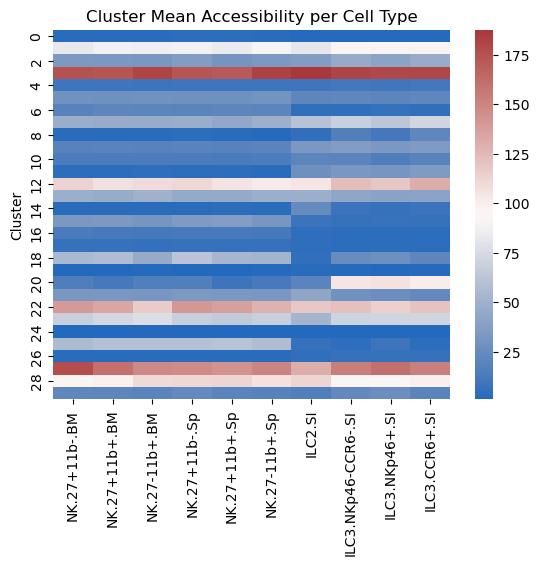

                        T8.Tcm.LCMV.d180.Sp  T8.Tem.LCMV.d180.Sp  NKT.Sp  \
ImmGenATAC1219.peakID                                                      
ImmGenATAC1219.peak_1                  0.71                 2.78    0.56   
ImmGenATAC1219.peak_2                  0.94                 3.56    0.98   
ImmGenATAC1219.peak_3                  1.32                 2.79    0.56   
ImmGenATAC1219.peak_4                  3.41                 0.11    2.86   
ImmGenATAC1219.peak_5                  0.94                 0.11    1.59   
ImmGenATAC1219.peak_6                  0.15                 2.94    1.85   
ImmGenATAC1219.peak_7                  1.50                 1.23    1.59   
ImmGenATAC1219.peak_8                  2.60                 0.11    0.53   
ImmGenATAC1219.peak_9                  0.15                 0.59    1.14   
ImmGenATAC1219.peak_10                 0.71                 1.07    0.98   

                        NKT.Sp.LPS.3hr  NKT.Sp.LPS.18hr  NKT.Sp.LPS.3d  \
ImmGenATAC121

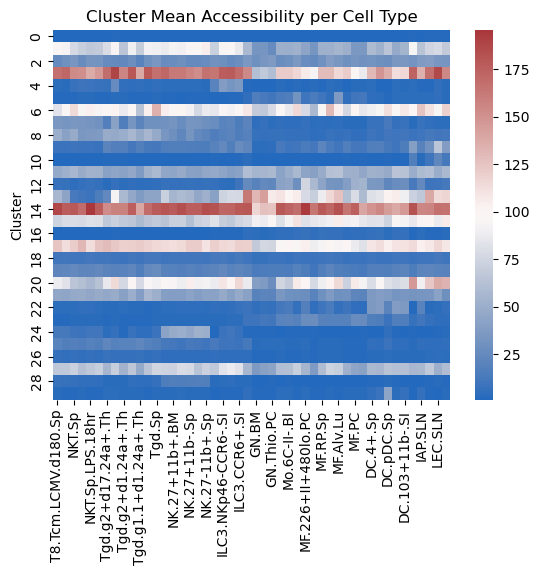

In [3]:
print("13. **Can one define different classes of peaks based on the signal and its variation across cells?**")

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]
df_expr = df_expr.iloc[:5000, :]
df_expr.index = df_raw.iloc[:5000, :] 
print(df_expr[:10])

# PCA with 9 components
#pca = PCA(n_components=9)
#X_pca = pca.fit_transform(df_expr)
#plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('PCA of OCRs across cell types')
#plt.show()

from sklearn.cluster import KMeans

k = 30  
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag')
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()

#Next: compare NK and ILC to other cell types
# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw.iloc[:5000, 50:]
df_expr.index = df_raw.iloc[:5000, 0] 
print(df_expr[:10])

# PCA with 9 components
#pca = PCA(n_components=9)
#X_pca = pca.fit_transform(df_expr)
#plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('PCA of OCRs across cell types')
#plt.show()

from sklearn.cluster import KMeans

k = 30  
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag')
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()
